<a href="https://colab.research.google.com/github/emharsha1812/Course---Generative-Agentic-AI-in-Practice/blob/main/Multi_Modal_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal AI Systems Tutorial

## Table of Contents
1. Introduction to Multi-Modal AI
2. Vision-Language Models (VLMs)
3. Audio Models: ASR and TTS
4. CLIP: Connecting Vision and Text
5. Diffusion Models: DDPM and Stable Diffusion
6. Flow-Based Models

## Learning Objectives
- Understand the architecture and applications of multi-modal AI systems
- Explore Vision-Language Models and their capabilities
- Learn about Audio processing with ASR and TTS systems
- Implement CLIP for image-text understanding
- Understand diffusion models and their training process
- See practical examples of why models accept multiple input modalities

## Prerequisites
- Basic knowledge of deep learning
- Familiarity with PyTorch/TensorFlow
- Understanding of transformers architecture


In [ ]:
!pip install torch torchvision torchaudio --quiet
!pip install transformers diffusers --quiet
!pip install git+https://github.com/openai/whisper.git --quiet  # For ASR
!pip install pillow requests --quiet  # For image processing

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done



---
## 1. Introduction to Multi-Modal AI

Multi-modal AI systems process and understand multiple types of data:
- Vision (images, videos)
- Language (text)
- Audio (speech, music, sounds)
- Other modalities (sensor data, time series)


Why Multi-Modal?
1. Human-like understanding requires multiple senses
2. Richer representations through cross-modal learning
3. Better generalization and robustness
4. Real-world applications demand multi-modal input


Key Challenges:
- Alignment between modalities
- Different data distributions and scales
- Computational complexity
- Training data requirements

---
## 2. Vision-Language Models bridge computer vision and natural language processing.

Popular VLM Architectures:
1. **CLIP** - Contrastive Language-Image Pre-training
2. **BLIP** - Bootstrapping Language-Image Pre-training
3. **FLAMINGO** - Few-shot learning with retrieval augmentation
4. **GPT-4V** - Multi-modal GPT
5. **LLaVA** - Large Language and Vision Assistant

Key Applications:
- Image captioning
- Visual question answering (VQA)
- Image-text retrieval
- Zero-shot image classification


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

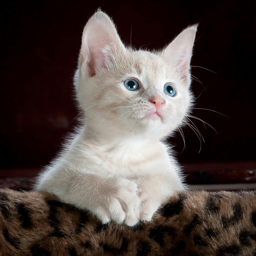

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch, requests

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

img_url = 'https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg'
image = Image.open(requests.get(img_url, stream=True).raw).resize((256, 256))
display(image)


In [ ]:

captions = [
    "A cat with open eyes",
    "A photo of a cat",
    "A photo of code on a screen",
]
inputs = clip_processor(text=captions, images=image, return_tensors="pt", padding=True)
outputs = clip_model(**inputs)
probs = outputs.logits_per_image.softmax(dim=1)
for cap, p in zip(captions, probs[0]):
    print(f"{cap}: {p.item():.3f}")

A cat with open eyes: 0.135
A photo of a cat: 0.859
A photo of code on a screen: 0.005


Loading BLIP model for image captioning...


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Generated Caption: a kitten sitting on a blanket


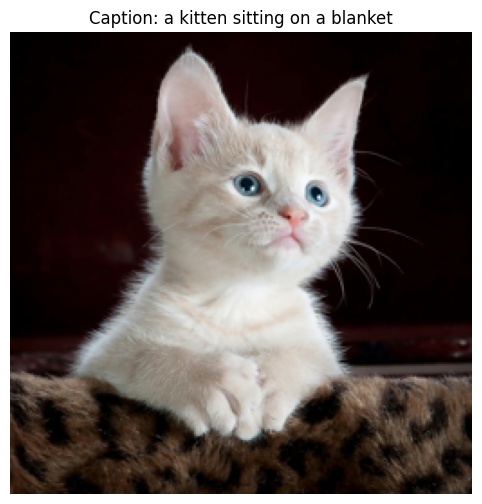

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from transformers import pipeline
import matplotlib.pyplot as plt

# Load BLIP model for image captioning
print("Loading BLIP model for image captioning...")
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Process image
inputs = blip_processor(image, return_tensors="pt")

# Generate caption
out = blip_model.generate(**inputs, max_length=50)
caption = blip_processor.decode(out[0], skip_special_tokens=True)

print(f"Generated Caption: {caption}")

# Display image (if in notebook environment)
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title(f"Caption: {caption}")
plt.axis('off')
plt.show()

---
## 3. Audio Models in Multi-Modal Systems:

**Automatic Speech Recognition (ASR):**
- Converts speech to text
- Models: Whisper, Wav2Vec2, DeepSpeech
- Applications: Voice assistants, transcription

**Text-to-Speech (TTS):**
- Converts text to speech
- Models: Tacotron, FastSpeech, VALL-E
- Applications: Voice synthesis, accessibility

**Why Audio in Multi-Modal Systems?**
- Natural human communication includes speech
- Audio provides temporal information
- Emotional and prosodic cues
- Accessibility and user experience


In [ ]:
import whisper

whisper_model = whisper.load_model("small")  # Options: tiny, base, small, medium, large
# Upload your own .wav file or use a sample from the web
!wget -O sample.wav https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac
result = whisper_model.transcribe('sample.wav')
print("Transcript:", result['text'])

100%|███████████████████████████████████████| 461M/461M [00:50<00:00, 9.53MiB/s]


--2025-09-03 03:33:53--  https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac
Resolving huggingface.co (huggingface.co)... 108.138.246.71, 108.138.246.67, 108.138.246.85, ...
Connecting to huggingface.co (huggingface.co)|108.138.246.71|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: /api/resolve-cache/datasets/Narsil/asr_dummy/8d141c84e3f84c54cd7bbaa851d24edd0f559734/mlk.flac?%2Fdatasets%2FNarsil%2Fasr_dummy%2Fresolve%2Fmain%2Fmlk.flac=&etag=%22da389eaecc195425b87a79c6a17017705d7341a3%22 [following]
--2025-09-03 03:33:53--  https://huggingface.co/api/resolve-cache/datasets/Narsil/asr_dummy/8d141c84e3f84c54cd7bbaa851d24edd0f559734/mlk.flac?%2Fdatasets%2FNarsil%2Fasr_dummy%2Fresolve%2Fmain%2Fmlk.flac=&etag=%22da389eaecc195425b87a79c6a17017705d7341a3%22
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 200 OK
Length: 383447 (374K) [audio/x-flac]
Saving to: ‘sample.wav’

sample.wav       

---
##  Text-to-Speech (TTS): Example with Bark


In [ ]:
!pip install git+https://github.com/suno-ai/bark.git  --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
# TTS Pipeline (using Hugging Face)
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

print("Loading TTS model...")
tts_processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
tts_model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

Loading TTS model...


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [ ]:
!pip install TTS

ERROR: Ignored the following versions that require a different python version: 0.0.10.2 Requires-Python >=3.6.0, <3.9; 0.0.10.3 Requires-Python >=3.6.0, <3.9; 0.0.11 Requires-Python >=3.6.0, <3.9; 0.0.12 Requires-Python >=3.6.0, <3.9; 0.0.13.1 Requires-Python >=3.6.0, <3.9; 0.0.13.2 Requires-Python >=3.6.0, <3.9; 0.0.14.1 Requires-Python >=3.6.0, <3.9; 0.0.15 Requires-Python >=3.6.0, <3.9; 0.0.15.1 Requires-Python >=3.6.0, <3.9; 0.0.9 Requires-Python >=3.6.0, <3.9; 0.0.9.1 Requires-Python >=3.6.0, <3.9; 0.0.9.2 Requires-Python >=3.6.0, <3.9; 0.0.9a10 Requires-Python >=3.6.0, <3.9; 0.0.9a9 Requires-Python >=3.6.0, <3.9; 0.1.0 Requires-Python >=3.6.0, <3.10; 0.1.1 Requires-Python >=3.6.0, <3.10; 0.1.2 Requires-Python >=3.6.0, <3.10; 0.1.3 Requires-Python >=3.6.0, <3.10; 0.10.0 Requires-Python >=3.7.0, <3.11; 0.10.1 Requires-Python >=3.7.0, <3.11; 0.10.2 Requires-Python >=3.7.0, <3.11; 0.11.0 Requires-Python >=3.7.0, <3.11; 0.11.1 Requires-Python >=3.7.0, <3.11; 0.12.0 Requires-Python >=3

In [ ]:
from bark import SAMPLE_RATE, generate_audio, preload_models
from IPython.display import Audio

preload_models()

text_prompt = "Hello, this voice was synthesized by a Transformers-based TTS system."
audio_array = generate_audio(text_prompt)
Audio(audio_array, rate=SAMPLE_RATE)

text_2.pt:   0%|          | 0.00/5.35G [00:00<?, ?B/s]

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL numpy.core.multiarray.scalar was not an allowed global by default. Please use `torch.serialization.add_safe_globals([numpy.core.multiarray.scalar])` or the `torch.serialization.safe_globals([numpy.core.multiarray.scalar])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [ ]:
from transformers import pipeline

pipe = pipeline("text-to-speech", model="suno/bark-small")
text = "[clears throat] This is a test ... and I just took a long pause."
output = pipe(text)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


---
## 4. Diffusion Models:

**Denoising Diffusion Probabilistic Models (DDPM):**
1. Forward process: Gradually add noise to data
2. Reverse process: Learn to denoise
3. Training: Predict the noise added at each step
4. Generation: Start from noise, iteratively denoise

**Stable Diffusion:**
1. Works in latent space (more efficient)
2. Uses VAE encoder/decoder
3. Cross-attention for text conditioning
4. U-Net architecture for denoising

**Why Multi-Modal?**
- Text-to-image generation
- Image editing with text prompts
- Controllable generation
- Cross-modal understanding


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

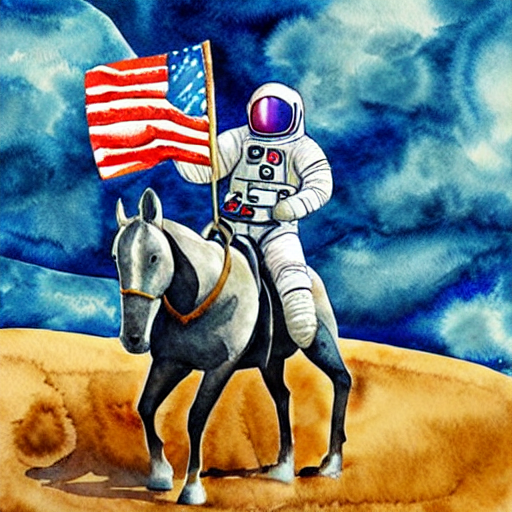

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

prompt = "astronaut riding a horse on the moon, watercolor art"
image = pipe(prompt).images[0]
display(image)

---
## 5. Flow-Based Models (Normalizing Flows):

**Key Concepts:**
1. Invertible transformations between data and latent space
2. Exact likelihood computation
3. Bijective mappings with tractable Jacobians
4. Examples: RealNVP, Glow, Flow++

**Advantages:**
- Exact likelihood estimation
- Stable training (no mode collapse)
- Bidirectional generation and inference

**In Multi-Modal Context:**
- Cross-modal generation
- Exact probability estimates
- Controllable generation
- Style transfer applications

**Popular Architectures:**
- Coupling layers (RealNVP)
- Autoregressive flows
- Continuous normalizing flows (CNFs)



In [ ]:
from datasets import load_dataset

# Load a vision-language dataset
ds = load_dataset("laion/laion400m")  # Or replace with smaller e.g. "recognai/citation-lab"
print(ds["train"][0])

DatasetNotFoundError: Dataset 'laion/laion400m' is a gated dataset on the Hub. You must be authenticated to access it.


**Reference:** [HuggingFace Multimodal][10]

---
## 9. Why Can Models Accept Image/Video Input?

- Encoders for each modality (image: CNN/ViT, text: Transformer) produce *aligned embeddings* in a shared space
- Design enables downstream tasks with flexible input (image, text, sometimes video as sequential frames)
- **Video models** process sequences of frames with time-aware architectures or treat as multi-frame images (e.g., Video CLIP)

---
## 10. Further Reading and References
- [HuggingFace VLM Course](https://huggingface.co/learn/computer-vision-course/en/unit4/multimodal-models/vlm-intro)
- [CLIP GitHub](https://github.com/openai/CLIP)
- [HuggingFace Diffusers](https://huggingface.co/docs/diffusers/en/tutorials/basic_training)
- [Normalizing Flows Notes](https://deepgenerativemodels.github.io/notes/flow/)
- [RealNVP Normalizing Flows GitHub](https://github.com/VincentStimper/normalizing-flows)

**Compiled with sources from public notebooks and blog posts for rapid classroom prototyping.**


## Key Takeaways

### 1. Multi-Modal AI Systems
- Combine multiple data modalities for richer understanding
- Require careful alignment and fusion strategies
- Enable more human-like AI interactions

### 2. Vision-Language Models (VLMs)
- Bridge computer vision and NLP
- Enable zero-shot capabilities through joint training
- Applications: captioning, VQA, retrieval

### 3. Audio Models
- ASR: Speech-to-text conversion
- TTS: Text-to-speech synthesis
- Critical for natural human-AI interaction

### 4. Diffusion Models
- State-of-the-art for image generation
- Text conditioning enables controllable generation
- DDPM and Stable Diffusion are key architectures

### 5. Flow-Based Models
- Provide exact likelihood estimation
- Invertible transformations
- Useful for cross-modal generation

## Best Practices

### Training Multi-Modal Models:
1. **Data Alignment**: Ensure proper temporal/semantic alignment
2. **Modality Balancing**: Handle different scales and distributions
3. **Progressive Training**: Start with single modalities, then joint training
4. **Regularization**: Use dropout and batch normalization

### Architecture Design:
1. **Modular Design**: Separate encoders for each modality
2. **Attention Mechanisms**: Use cross-attention for modality interaction
3. **Shared Representations**: Project to common embedding space
4. **Skip Connections**: Preserve fine-grained information

### Evaluation:
1. **Single-Modality Baselines**: Compare against unimodal models
2. **Cross-Modal Tasks**: Test retrieval and generation capabilities
3. **Ablation Studies**: Analyze contribution of each modality
4. **Human Evaluation**: For subjective tasks like generation

## Common Challenges and Solutions

### Challenge 1: Modality Imbalance
**Problem**: Different modalities have different information density
**Solution**: Adaptive weighting, modality-specific losses

### Challenge 2: Computational Complexity
**Problem**: Processing multiple modalities is expensive
**Solution**: Efficient architectures, progressive training, pruning

### Challenge 3: Data Availability
**Problem**: Multi-modal datasets are often limited
**Solution**: Self-supervised learning, data augmentation, synthetic data

### Challenge 4: Evaluation Metrics
**Problem**: No standard metrics for multi-modal tasks
**Solution**: Task-specific metrics, human evaluation, cross-modal retrieval

## Future Directions

1. **Unified Multi-Modal Architectures**: Single models handling all modalities
2. **Few-Shot Multi-Modal Learning**: Learning from limited examples
3. **Real-Time Multi-Modal Processing**: Efficient inference for interactive applications
4. **Ethical Considerations**: Bias, fairness, and safety in multi-modal AI
5. **Embodied AI**: Integration with robotics and physical systems